In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("X/X_train.parquet")
X_test = pd.read_parquet("X/X_test.parquet")
Y_train = pd.read_parquet("Y/Y_train.parquet")
Y_test = pd.read_parquet("Y/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
Complete = pd.read_parquet("dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))
Y1_train = Y_train[[0]]
Y1_test = Y_test[[0]]
Y2_train = Y_train[[1]]
Y2_test = Y_test[[1]]
Y3_train = Y_train[[2]]
Y3_test = Y_test[[2]]
Y4_train = Y_train[[3]]
Y4_test = Y_test[[3]]
Y5_train = Y_train[[4]]
Y5_test = Y_test[[4]]
Y6_train = Y_train[[5]]
Y6_test = Y_test[[5]]

## Train and score

In [4]:
parameters = {'kernel':['linear', 'rbf'],
              'C':[0.5, 1, 5, 10, 50, 100],
              'epsilon':[0.1, 0.01, 0.001]}

In [5]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [6]:
g = GridSearch(svm.SVR(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = svm.SVR(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.04108285903930664 s
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.014923572540283203 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.12617731094360352 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.1200108528137207 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.2221992015838623 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.17345738410949707 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.07130002975463867 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}, 7 de 36
Tiempo de entrenamiento: 0.021847963333129883 s
Probando: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}, 8 de 36
Tiempo de entrenamiento: 0.17120981216430

In [7]:
g = GridSearch(svm.SVR(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = svm.SVR(**g).fit(X_train, np.ravel(Y2_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.06664085388183594 s
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.0402216911315918 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.09203934669494629 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.10825967788696289 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.15438318252563477 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.13651156425476074 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.053936004638671875 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}, 7 de 36
Tiempo de entrenamiento: 0.03825235366821289 s
Probando: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}, 8 de 36
Tiempo de entrenamiento: 0.13058352470397

In [8]:
g = GridSearch(svm.SVR(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = svm.SVR(**g).fit(X_train, np.ravel(Y3_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.06339526176452637 s
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.01373291015625 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.10896515846252441 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.06853485107421875 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.13647174835205078 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.11280679702758789 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.05553245544433594 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}, 7 de 36
Tiempo de entrenamiento: 0.009716510772705078 s
Probando: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}, 8 de 36
Tiempo de entrenamiento: 0.1458640098571777

In [9]:
g = GridSearch(svm.SVR(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True)
clf4 = svm.SVR(**g).fit(X_train, np.ravel(Y4_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.0614011287689209 s
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.010699272155761719 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.17932939529418945 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.09395575523376465 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.24814772605895996 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.18201446533203125 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.0632162094116211 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}, 7 de 36
Tiempo de entrenamiento: 0.015232324600219727 s
Probando: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}, 8 de 36
Tiempo de entrenamiento: 0.19421577453613

In [10]:
g = GridSearch(svm.SVR(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = svm.SVR(**g).fit(X_train, np.ravel(Y5_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.04548501968383789 s
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.03226613998413086 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.11983609199523926 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.12246966361999512 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.14611363410949707 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.11699390411376953 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.04909706115722656 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}, 7 de 36
Tiempo de entrenamiento: 0.029893159866333008 s
Probando: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}, 8 de 36
Tiempo de entrenamiento: 0.1924269199371

In [11]:
g = GridSearch(svm.SVR(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = svm.SVR(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.05340743064880371 s
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.030957937240600586 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.11699676513671875 s
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.08520054817199707 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.11754560470581055 s
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.15258407592773438 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.06000804901123047 s
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}, 7 de 36
Tiempo de entrenamiento: 0.023061752319335938 s
Probando: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}, 8 de 36
Tiempo de entrenamiento: 0.128020286560

## Test for each year

In [12]:
np.abs(clf6.predict(X_test.iloc[0::4]) - np.array(Y6_test.iloc[0::4][5])).mean()

0.009708239902747383

In [13]:
np.abs(clf6.predict(X_test.iloc[1::4]) - np.array(Y6_test.iloc[1::4][5])).mean()

0.01211188893151437

In [14]:
np.abs(clf6.predict(X_test.iloc[2::4]) - np.array(Y6_test.iloc[2::4][5])).mean()

0.013236470642805514

In [15]:
np.abs(clf6.predict(X_test.iloc[3::4]) - np.array(Y6_test.iloc[3::4][5])).mean()

0.014277515361671815

## One concrete example

In [16]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

array([[ 62399.12399249, 135907.68321409,   4009.59114036,
          1154.83370351,   2393.42172804,  50006.58970555,
          1990.        ]])

In [17]:
scalerY.inverse_transform([Y_test.iloc[i]])

array([[ 57900., 136649.,   3206.,    821.,   2385.,  49816.,   2014.]])

## Probamos con España

In [18]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [19]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

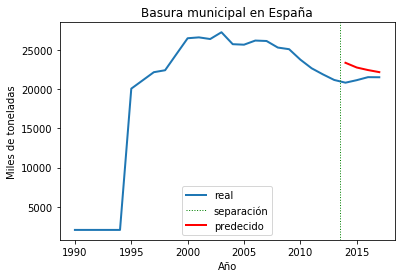

In [20]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [21]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

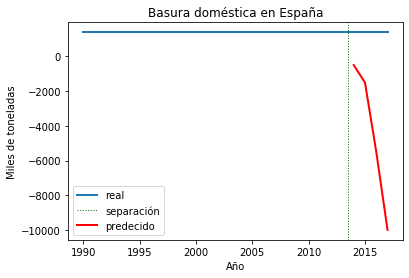

In [22]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [23]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

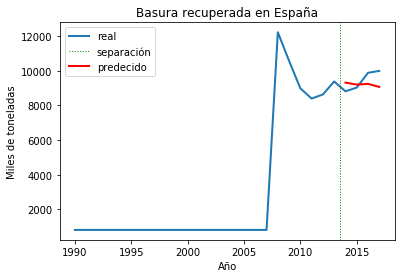

In [24]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [25]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

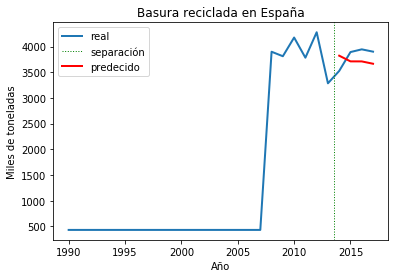

In [26]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [27]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

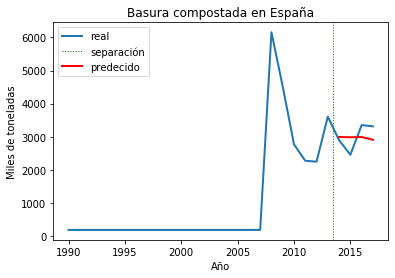

In [28]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [29]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

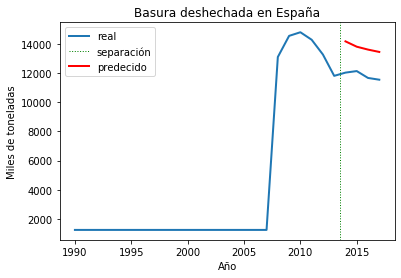

In [30]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura deshechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()